In [3]:
import psycopg2
import random
from faker import Faker

fake = Faker()

conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",  
    password="your_password",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

num_records = 100 
countries = ["USA", "Canada", "UK", "Germany", "France", "Australia", "India"]

insert_query = """
INSERT INTO investors (name, email, country) VALUES (%s, %s, %s);
"""

for _ in range(num_records):
    name = fake.name()
    email = fake.email()
    country = random.choice(countries)
    
    cur.execute(insert_query, (name, email, country))

conn.commit()
cur.close()
conn.close()

print(f"{num_records} sample investors added successfully!")

100 sample investors added successfully!


In [4]:
import psycopg2
import random
from faker import Faker

fake = Faker()

conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",
    password="your_password",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

cur.execute("SELECT investor_id FROM investors;")
investor_ids = [row[0] for row in cur.fetchall()]

num_portfolios = 150
portfolio_names = ["Tech Fund", "Growth Portfolio", "Index Fund", "Crypto Assets", "Dividend Stocks"]

insert_query = """
INSERT INTO portfolios (investor_id, portfolio_name) VALUES (%s, %s);
"""

for _ in range(num_portfolios):
    investor_id = random.choice(investor_ids)
    portfolio_name = random.choice(portfolio_names)

    cur.execute(insert_query, (investor_id, portfolio_name))

conn.commit()
cur.close()
conn.close()

print(f"{num_portfolios} sample portfolios added successfully!")

150 sample portfolios added successfully!


In [8]:
import pandas as pd
stock_list = pd.read_csv("nasdaq_screener.csv")
stock_list = stock_list.sort_values(by="Market Cap",ascending=False)
stock_list_symbols = stock_list["Symbol"].to_list()

In [ ]:
import psycopg2
import random
from faker import Faker


fake = Faker()


conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",  
    password="your_password",  
    host="localhost",
    port="5432"
)
cur = conn.cursor()


cur.execute("SELECT portfolio_id FROM portfolios;")
portfolio_ids = [row[0] for row in cur.fetchall()]


num_transactions = 500  
stock_symbols = stock_list_symbols
transaction_types = ["BUY", "SELL"]

insert_query = """
INSERT INTO stock_transactions (portfolio_id, stock_symbol, transaction_type, shares, price_per_share)
VALUES (%s, %s, %s, %s, %s);
"""

for _ in range(num_transactions):
    portfolio_id = random.choice(portfolio_ids)
    stock_symbol = random.choice(stock_symbols)
    transaction_type = random.choice(transaction_types)
    shares = random.randint(1, 100)
    price_per_share = round(random.uniform(50, 3000), 2)

    cur.execute(insert_query, (portfolio_id, stock_symbol, transaction_type, shares, price_per_share))


conn.commit()
cur.close()
conn.close()

print(f"{num_transactions} sample stock transactions added successfully!")

500 sample stock transactions added successfully!


In [ ]:
import pandas as pd
import psycopg2


conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",
    password="your_password",
    host="localhost",
    port="5432"
)


query = """
SELECT t.transaction_id, p.portfolio_name, t.stock_symbol, t.transaction_type, t.shares, t.price_per_share, t.transaction_date
FROM stock_transactions t
JOIN portfolios p ON t.portfolio_id = p.portfolio_id
ORDER BY t.transaction_date DESC;
"""
df = pd.read_sql(query, conn)


print(df)


conn.close()


     transaction_id    portfolio_name stock_symbol transaction_type  shares  \
0                 1        Index Fund         CCEC              BUY      36   
1                 2         Tech Fund         GANX              BUY      70   
2                 3  Growth Portfolio         TECX              BUY      28   
3                 4   Dividend Stocks          ZJK              BUY      65   
4                 5     Crypto Assets         ALXO             SELL      73   
..              ...               ...          ...              ...     ...   
495             496  Growth Portfolio        DGICA             SELL      98   
496             497         Tech Fund          TWI              BUY      16   
497             498   Dividend Stocks         JOUT              BUY      32   
498             499   Dividend Stocks         GRVY              BUY      42   
499             500         Tech Fund         KMDA              BUY      49   

     price_per_share           transaction_date  
0

/var/folders/f4/qdc9f4c52zv8lln2y0_8by1c0000gn/T/ipykernel_2662/2945398259.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
import yfinance as yf
import pandas as pd
import psycopg2


conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",
    password="your_password",
    host="localhost",
    port="5432"
)
cur = conn.cursor()


stock_symbols = stock_list_symbols[:100]


insert_query = """
INSERT INTO stock_prices (stock_symbol, date, open_price, high_price, low_price, close_price, volume)
VALUES (%s, %s, %s, %s, %s, %s, %s)
ON CONFLICT (stock_symbol, date) DO NOTHING;
"""


for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    df = stock.history(period="30d")  

    for index, row in df.iterrows():
        cur.execute(insert_query, (
            symbol,
            index.date(),
            float(row["Open"]),    
            float(row["High"]),
            float(row["Low"]),
            float(row["Close"]),
            int(row["Volume"]) if not pd.isna(row["Volume"]) else 0  
        ))


conn.commit()
cur.close()
conn.close()

print("Stock prices successfully inserted!")


Failed to get ticker 'BRK/A' reason: Expecting value: line 1 column 1 (char 0)
$BRK/A: possibly delisted; no price data found  (period=30d)
Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
$BRK/B: possibly delisted; no price data found  (period=30d)


Stock prices successfully inserted!


/var/folders/f4/qdc9f4c52zv8lln2y0_8by1c0000gn/T/ipykernel_2662/3271700047.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_5_stocks = pd.read_sql_query(query, conn)["stock_symbol"].tolist()
/var/folders/f4/qdc9f4c52zv8lln2y0_8by1c0000gn/T/ipykernel_2662/3271700047.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


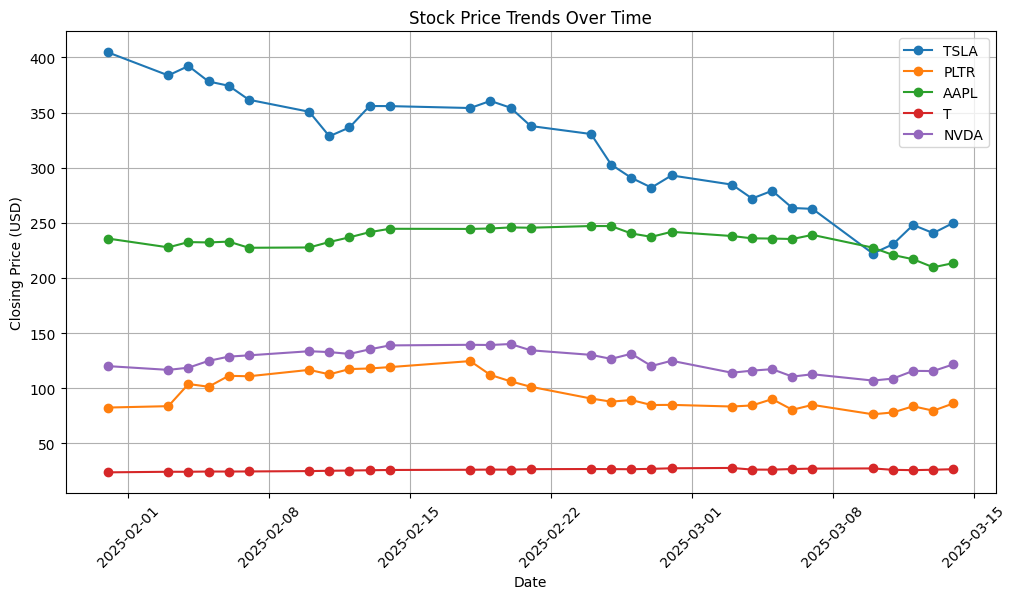

In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt


conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",
    password="your_password",
    host="localhost",
    port="5432"
)


query = """
SELECT stock_symbol, SUM(volume) as total_volume
FROM stock_prices
GROUP BY stock_symbol
ORDER BY total_volume DESC
LIMIT 5;
"""
top_5_stocks = pd.read_sql_query(query, conn)["stock_symbol"].tolist()


query = f"""
SELECT date, stock_symbol, close_price 
FROM stock_prices
WHERE stock_symbol IN {tuple(top_5_stocks)}
ORDER BY date ASC;
"""
df = pd.read_sql_query(query, conn)
conn.close()


plt.figure(figsize=(12,6))
for symbol in df["stock_symbol"].unique():
    temp_df = df[df["stock_symbol"] == symbol]
    plt.plot(temp_df["date"], temp_df["close_price"], marker="o", linestyle="-", label=symbol)

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Stock Price Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid()


plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import psycopg2


conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",
    password="your_password",
    host="localhost",
    port="5432"
)
cur = conn.cursor()


market_indices = {
    "^GSPC": "S&P 500",
    "^IXIC": "Nasdaq Composite",
    "^RUT": "Russell 2000",
    "^NYA": "NYSE COMPOSITE (DJ)",
    "^DJCA": "Dow Jones Composite Average",
    "^VIX": "CBOE Volatility Index"
}


insert_query = """
INSERT INTO market_indices (index_id, index_name, date, closing_value)
VALUES (%s, %s, %s, %s)
ON CONFLICT (index_id, date) DO NOTHING;
"""


for index_symbol, index_name in market_indices.items():
    index_data = yf.Ticker(index_symbol)
    df = index_data.history(period="30d")  

    for index, row in df.iterrows():
        cur.execute(insert_query, (
            index_symbol,
            index_name,
            index.date(),
            float(row["Close"])  
        ))


conn.commit()
cur.close()
conn.close()

print("Market index data successfully inserted!")

$^DJCA: possibly delisted; no price data found  (period=30d) (Yahoo error = "No data found, symbol may be delisted")


Market index data successfully inserted!


/var/folders/f4/qdc9f4c52zv8lln2y0_8by1c0000gn/T/ipykernel_2662/1378721844.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


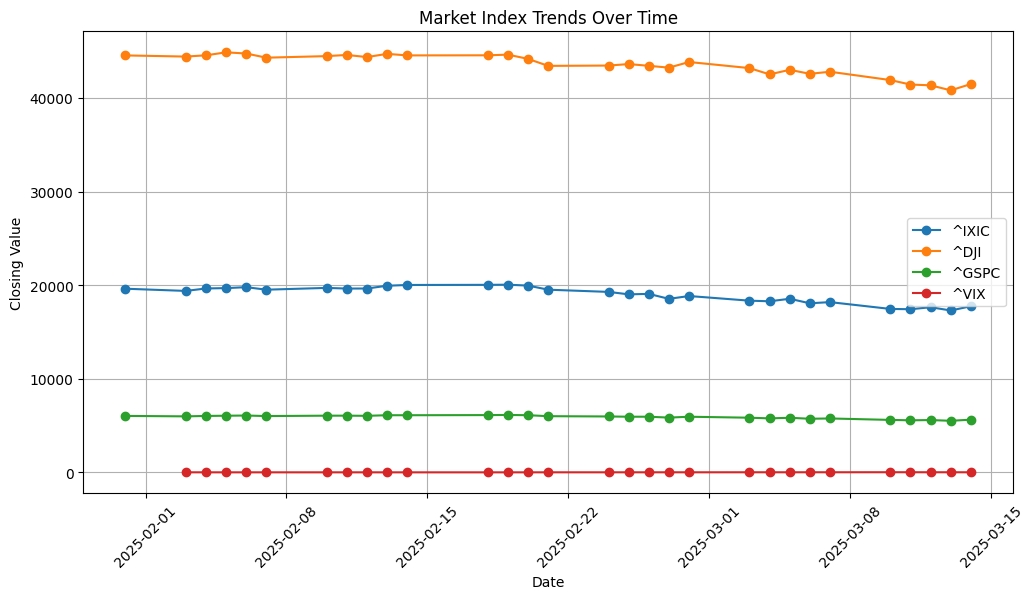

In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt


conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",
    password="your_password",
    host="localhost",
    port="5432"
)


query = """
SELECT date, index_id, closing_value FROM market_indices
WHERE index_id IN ('^GSPC', '^IXIC', '^DJI', '^VIX')
ORDER BY date ASC;
"""
df = pd.read_sql(query, conn)
conn.close()


plt.figure(figsize=(12, 6))
for index in df["index_id"].unique():
    temp_df = df[df["index_id"] == index]
    plt.plot(temp_df["date"], temp_df["closing_value"], marker="o", linestyle="-", label=index)

plt.xlabel("Date")
plt.ylabel("Closing Value")
plt.title("Market Index Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid()


plt.show()


/var/folders/f4/qdc9f4c52zv8lln2y0_8by1c0000gn/T/ipykernel_2662/2809872756.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top5_portfolio = pd.read_sql_query(query, conn)


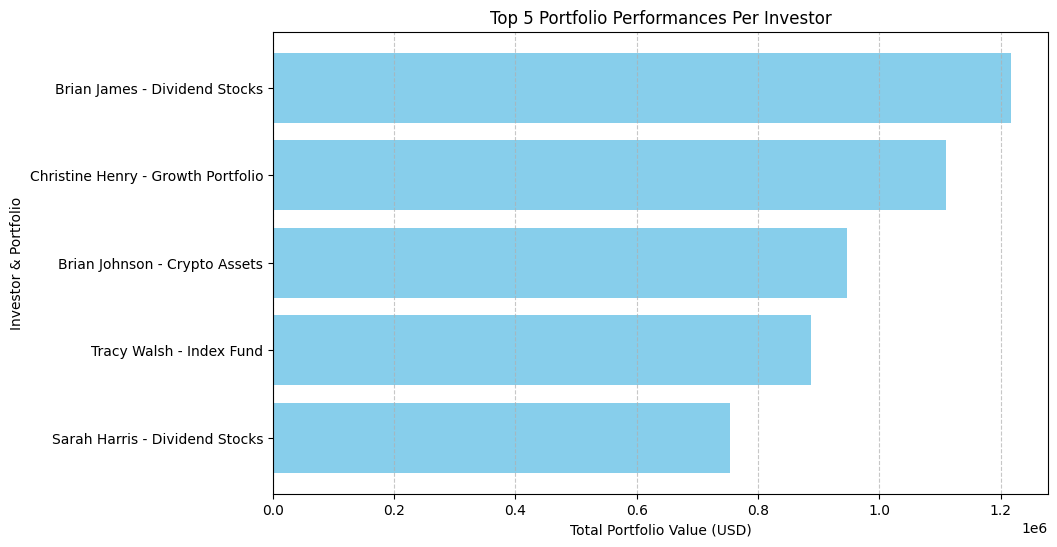

In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt


conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",
    password="your_password",
    host="localhost",
    port="5432"
)


query = """
SELECT i.name AS investor_name, p.portfolio_name, 
       SUM(t.shares * t.price_per_share) AS total_portfolio_value
FROM investors i
JOIN portfolios p ON i.investor_id = p.investor_id
JOIN stock_transactions t ON p.portfolio_id = t.portfolio_id
GROUP BY i.name, p.portfolio_name
ORDER BY total_portfolio_value DESC
LIMIT 5;
"""


df_top5_portfolio = pd.read_sql_query(query, conn)


conn.close()


plt.figure(figsize=(10, 6))
plt.barh(df_top5_portfolio["investor_name"] + " - " + df_top5_portfolio["portfolio_name"],
         df_top5_portfolio["total_portfolio_value"],
         color="skyblue")

plt.xlabel("Total Portfolio Value (USD)")
plt.ylabel("Investor & Portfolio")
plt.title("Top 5 Portfolio Performances Per Investor")
plt.gca().invert_yaxis()  
plt.grid(axis="x", linestyle="--", alpha=0.7)


plt.show()


/var/folders/f4/qdc9f4c52zv8lln2y0_8by1c0000gn/T/ipykernel_2662/3514249333.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top5_tickers = pd.read_sql_query(query_top5, conn)["stock_symbol"].tolist()
/var/folders/f4/qdc9f4c52zv8lln2y0_8by1c0000gn/T/ipykernel_2662/3514249333.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_prices = pd.read_sql_query(query_prices, conn)


{'date': {0: datetime.date(2025, 1, 31), 1: datetime.date(2025, 1, 31), 2: datetime.date(2025, 1, 31), 3: datetime.date(2025, 1, 31), 4: datetime.date(2025, 1, 31)}, 'stock_symbol': {0: 'TSLA', 1: 'PLTR', 2: 'AAPL', 3: 'NVDA', 4: 'AMZN'}, 'close_price': {0: 404.6000061035156, 1: 82.48999786376953, 2: 235.74081420898438, 3: 120.0589599609375, 4: 237.67999267578125}, 'normalized_price': {0: 100.0, 1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0}, 'closing_value': {0: 6040.52978515625, 1: 6040.52978515625, 2: 6040.52978515625, 3: 6040.52978515625, 4: 6040.52978515625}, 'normalized_sp500': {0: 100.0, 1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0}}


/var/folders/f4/qdc9f4c52zv8lln2y0_8by1c0000gn/T/ipykernel_2662/3514249333.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sp500 = pd.read_sql_query(query_sp500, conn)


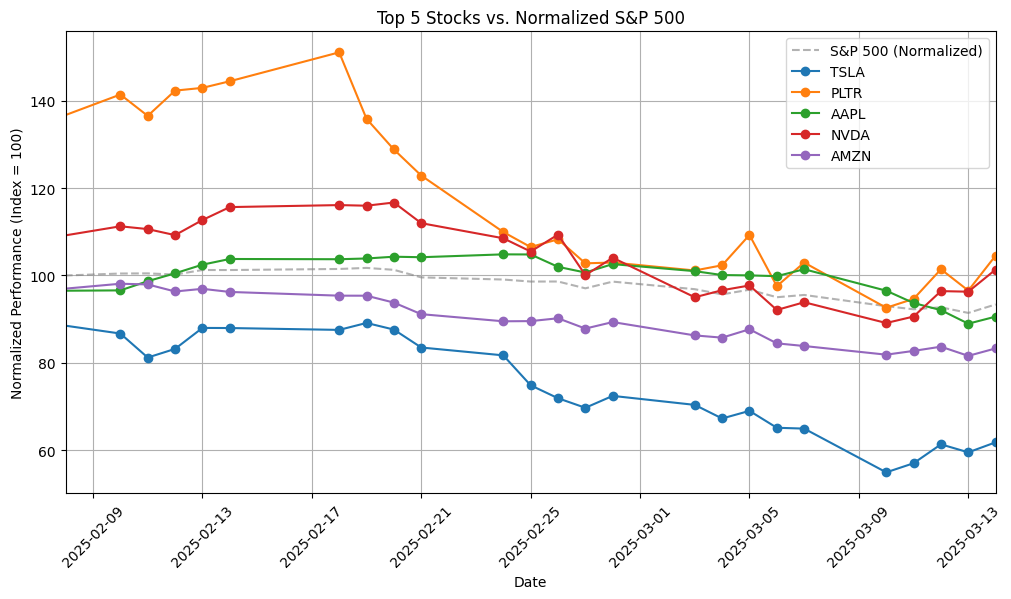

In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import datetime


conn = psycopg2.connect(
    dbname="stock_data",
    user="tori-ann",
    password="your_password",
    host="localhost",
    port="5432"
)


query_top5 = """
SELECT stock_symbol
FROM stock_prices
GROUP BY stock_symbol
ORDER BY MAX(close_price * volume) DESC
LIMIT 5;
"""
top5_tickers = pd.read_sql_query(query_top5, conn)["stock_symbol"].tolist()


query_prices = f"""
SELECT date, stock_symbol, close_price
FROM stock_prices
WHERE stock_symbol IN {tuple(top5_tickers)}
ORDER BY date ASC;
"""
df_prices = pd.read_sql_query(query_prices, conn)


query_sp500 = """
SELECT date, closing_value 
FROM market_indices
WHERE index_id = '^GSPC'
ORDER BY date ASC;
"""
df_sp500 = pd.read_sql_query(query_sp500, conn)


conn.close()


df_prices["normalized_price"] = df_prices.groupby("stock_symbol")["close_price"].transform(lambda x: (x / x.iloc[0]) * 100)


df_sp500["normalized_sp500"] = (df_sp500["closing_value"] / df_sp500["closing_value"].iloc[0]) * 100


df_merged = df_prices.merge(df_sp500, on="date", how="inner")


print(df_merged.head().to_dict())


start_date = datetime.date(2025, 2, 8)  


plt.figure(figsize=(12, 6))


plt.plot(df_merged["date"], df_merged["normalized_sp500"], linestyle="--", color="gray", alpha=0.6, label="S&P 500 (Normalized)")


for symbol in df_merged["stock_symbol"].unique():
    temp_df = df_merged[df_merged["stock_symbol"] == symbol]
    plt.plot(temp_df["date"], temp_df["normalized_price"], marker="o", linestyle="-", label=symbol)

plt.xlabel("Date")
plt.ylabel("Normalized Performance (Index = 100)")
plt.title("Top 5 Stocks vs. Normalized S&P 500")
plt.legend()
plt.xticks(rotation=45)
plt.grid()


plt.xlim([start_date, df_merged["date"].max()])


plt.show()